In [131]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

print(x_train.shape)
print (y_train.shape)
print (x_test.shape) 
print (y_test.shape)

#The 10 Objects of the cifar 10 dataset 

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


2.3.0
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]


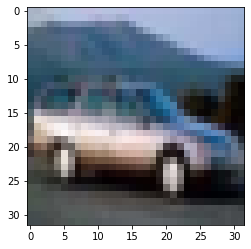

In [96]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[4],cmap='binary')
plt.show()

In [97]:
#one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_enco = to_categorical(y_train)
y_test_enco = to_categorical(y_test)
print (y_train_enco[0]) # label number 6

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [98]:
#validated shapes
print(y_train_enco.shape)
print(y_test_enco.shape)
#displayig encoded labels
y_train_enco[0]
print (x_train[0].shape)
x_train_sha = np.reshape(x_train,(50000,3072))
x_test_sha = np.reshape(x_test,(10000,3072))
print (x_train_sha.shape)

print (x_test_sha.shape)
# displaying all the pixel values in the first set of example
print (set(x_train_sha[0]))
print (x_train_sha)
print (x_test_sha)

(50000, 10)
(10000, 10)
(32, 32, 3)
(50000, 3072)
(10000, 3072)
{0, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 21

In [100]:
# normalization 
epsilon =1e-10
x_mean=np.mean(x_train_sha)
x_std=np.std(x_train_sha)
x_train_norm=(x_train_sha-x_mean)/(x_std + epsilon)
x_test_norm =(x_test_sha-x_mean)/(x_std+epsilon)
# displaying the normalized value of the pixel in the first set 
print (set(x_train_norm[0]))


{-0.9619250525647831, -0.899571268186059, -0.7436868072392488, 0.28515063500969795, -0.7125099150498868, -0.6657445767658439, -0.5098601158190337, -0.30721031658818054, 0.2539737428203359, -0.8060405916179729, 1.3763418616373688, -1.2736939744584033, -1.7257589112041527, 1.3451649694480068, 1.7972299061937562, -0.04220673297860333, 1.70369922962567, 1.2516342928799207, -1.3672246510264894, -1.8192895877722388, -0.07338362516796536, 1.1581036163118346, 1.610168553057584, 0.30073908110437897, -1.4607553275945755, -1.008690390848826, 2.0622334898033334, 1.0645729397437484, 1.9687028132352473, 1.5166378764894979, 0.6904502334714042, -1.1022210674169122, -1.5542860041626616, 0.40985820376714605, 0.16044306625224983, 0.19161995844161187, -0.10456051735732738, 0.6125080029979992, 1.8751721366671612, 1.4231071999214118, 0.5657426647139562, -1.1957517439849983, -1.6478166807307477, 0.5189773264299131, 1.781641460099075, -0.7904521455232919, 0.47221198814587007, -1.2892824205530844, 0.9242769248

In [101]:
#compile the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([Dense(128,activation='relu',input_shape=(3072,)),
Dense(128,activation='relu'),
Dense(10,activation='softmax')])
model.compile(
    optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy']
)
#To represent the architecture of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


In [102]:
#model.fit(x_train_norm,y_train_enco,epochs=10)
loss,accuracy = model.evaluate(x_test_norm,y_test_enco)
print('The test set accuracy is ',round(accuracy*100,2))

313/313 [==============================] - 0s 1ms/step - loss: 2.8191 - accuracy: 0.0969
The test set accuracy is  9.69


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


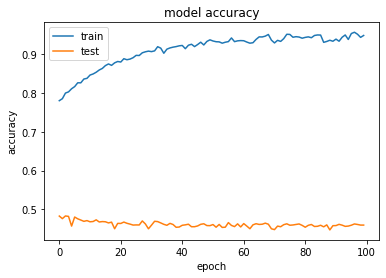

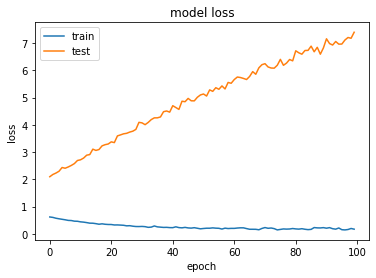

313/313 [==============================] - 0s 1ms/step - loss: 7.3391 - accuracy: 0.4615
The test set accuracy is  46.15


In [109]:
#Training the model
history = model.fit(x_train_norm,y_train_enco, validation_split=0.33, epochs=200, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

loss,accuracy = model.evaluate(x_test_norm,y_test_enco)
print('The test set accuracy is ',round(accuracy*100,2))

In [103]:
#For Prediction of the test set 

pred=model.predict(x_test_norm)

print ('Shape of pred',pred.shape)


Shape of pred (10000, 10)


In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


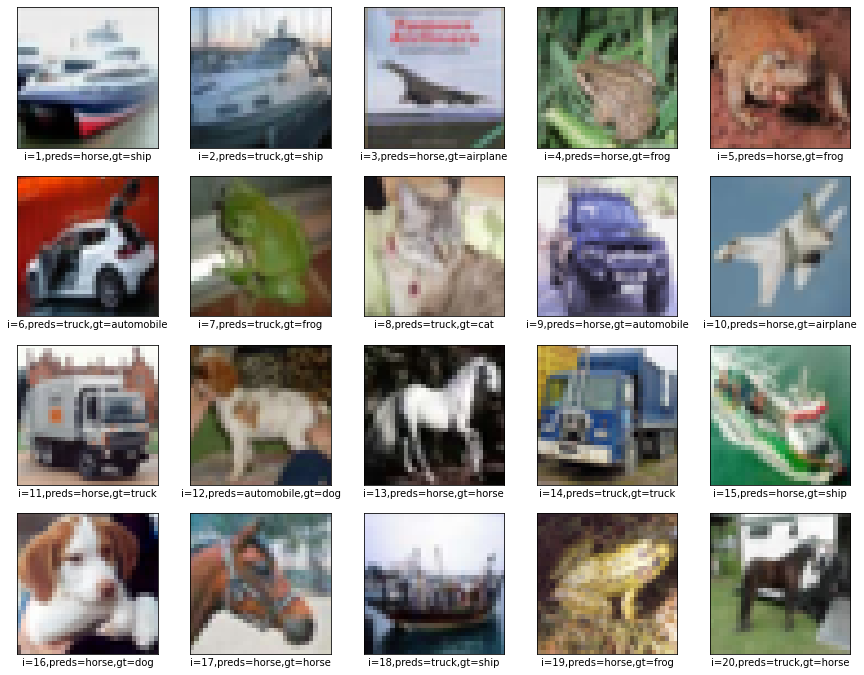

In [105]:
#Comparsion of the actual and predicted outcomes for the fisrt 20 testing sets 
plt.figure(figsize=(15,15))
start=1
for i in range (20):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  preds=np.argmax(pred[start+i])
  gt=y_test[start+i]
  col='g'
  if preds!= gt :
    col='r'
  plt.xlabel ('i={},preds={},gt={}'.format(start+i,cifar_classes[preds],cifar_classes[gt[0]]))
  plt.imshow(x_test[start+i],cmap='binary')
plt.show()


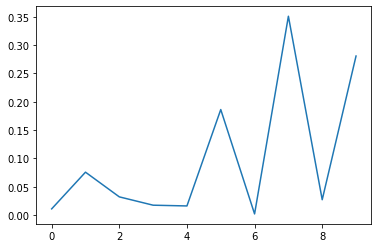

In [106]:
#Checking for which object the prediction has got the highest peak 
plt.plot(pred[cifar_classes.index('truck')])
plt.show()


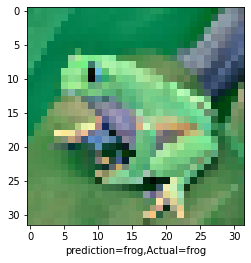

In [150]:
# Feeding the external image into the model to get a prediction result.

#Taking the external image as input for implementation

import cv2
img = cv2.imread('/content/drive/My Drive/frog2.jpg')
img = cv2.resize(img,(32,32))
imag = np.reshape(img,[1,32*32*3])

#For normalization

epsilon =1e-10
x_mean=np.mean(x_train_sha)
x_std=np.std(x_train_sha)
img_norm=(imag-x_mean)/(x_std + epsilon)
#print (img_norm)
cles =(model.predict(img_norm)) 
preds=np.argmax(cles)

#For plotting purpose

l=[]
l.append(cifar_classes.index('frog'))
plt.figure(figsize=(4,4))
plt.xlabel ('prediction={},Actual={}'.format(cifar_classes[preds],cifar_classes[l[0]]))
plt.imshow(img,cmap='binary')
plt.show()


